### <font color='black'>Overview</font>

Statistical analysis of the brightest galaxies in the Universe to demonstrate the Hubble law and that the Universe expands, and to measure the Hubble constant. Using approach based on Brightest Cluster Galaxies (BCGs).

The brightest galaxies in the Universe have logarithms of intrinsic brightnesses described by the Gaussian pdf with a constant mean. In this project, I calibrate the overall mean luminosity for a few galaxies, then use measurements of apparent brightnesses in conjunction with measurements of recession velocity to estimate $H_0$.

Apparent Magnitude: 

$$m = -2.5\log_{10}\,f + {\rm const} = -2.5\log_{10}\frac{L}{4\pi d^2}+ {\rm const},$$

Absolute Magnitude: 

$$m = -2.5\log_{10}\frac{L}{4\pi d^2}+ {\rm const} = -2.5\log_{10}\left[\frac{L}{4\pi (10\,{\rm pc})^2}\times \frac{(10\,{\rm pc})^2}{d^2}\right]+ {\rm const}$$

$$m = -2.5\log_{10}\frac{L}{4\pi (10\,{\rm pc})^2} + {\rm const} + 5\log_{10}\frac{d}{10\,{\rm pc}} = M + 5\log_{10}d - 5,$$

In Megaparsecs (Mpc):

$$m = M + 5\log_{10}d_{\rm Mpc} + 25.$$

Distance Modulus:

$$\mu = m-M =  5\log_{10}d_{\rm Mpc} + 25$$

Recession Velocity: 
$v_{\rm rec}=cz$ 
 
$c=299792$ km/s 

$cz = H_0d$ or $d = cz/H_0$. 

BCGs have a constant average absolute magnitude $M_0$ and standard deviation of sigma$M_0$:

$$m = 5\log_{10}cz + M_0 - 5\log_{10}H_0 + 25.$$

Weighted mean for $n$ measurements $x_i$ with uncertainty $\sigma_i$:

$$\bar{x} = \frac{{\rm sum}(w_i x_i)}{{\rm sum} (w_i)}, $$

where $w_i=1/\sigma^2_i$. 

Uncertainty:

$$\sigma_{\bar{x}} = \sqrt{\frac{1}{{\rm sum}(w_i)}}$$

With measurements of $m$ and $z$ you can constrain the combination  $M_0 - 5\log_{10}H_0 + 25$, but not $H_0$ directly. I use independent data that constrains $M_0$ by estimating the average absolute magnitude of a number of nearby BCGs for which independent distance estimates exist.

There is also significant scatter in the relation of $m_r$ and $z$. Most is the intrinsic scatter of absolute magnitudes of the BCG galaxies, but there are some exceptions. I remove the outliers using the sigma clipping algorithm in narrow intervals of $z$ ($\Delta z\approx 0.01-0.02$). I limited my analysis to galaxies with $z\leq 0.15$ because of the limitations of the SDSS survey. 

**The main SDSS BCG sample:** 
Sloan Digital Sky Survey (SDSS) and a catalog of BCGs derived from it. 

In [56]:
import numpy as np
from matplotlib import pylab as plt

In [58]:
import pandas 
import numpy as np

url = "https://drive.google.com/uc?id=1SOjdxSKAj4gWkq8ikGAzKMgorINzA14P"
catalog = pandas.read_csv(url)

z = np.array(catalog['zsp'], dtype='float') # spectroscopic redshift
mr = np.array(catalog['rmag'], dtype='float') # r-band magnitude
emr = np.array(catalog['e_rmag'], dtype='float') # uncertanty of r-band magnitude
gr = np.array(catalog['g-r'], dtype='float') # g-r color 
objid = np.array(catalog['objid'], dtype='int64') # SDSS unique object id
ra = np.array(catalog['RAJ2000'], dtype='float') # right ascension of the object
dec = np.array(catalog['DEJ2000'], dtype='float') # declination of the object


**BCG sample with independently measured distances:** 
A dozen nearby BCG galaxies selected in the Virgo cluster and other relatively nearby clusters.

In [60]:
# A couple dozen nearby BCGs in SDSS catalog: 
names_BCGs = np.array(['NGC 7649', 'NGC 7647', 'NGC 7578B', 'NGC 6166', 'NGC 6173', 'NGC 3842', 'IC 0712', 'IC 2738', 'NGC 3550 NED01', 'NGC 3551', 'UGC 05515', 'UGC 04289', 'UGC 00797','UGC 00579', 'NGC 6086', 'NGC 2832', 'NGC 6041A', 'CGCG 077-097', 'NGC 4886', 'NGC 4874', 'CGCG 156-042', 'MESSIER 049', 'MESSIER 087'])

# r-band model apparent magnitudes of these BCGs:
mr_BCGs = np.array([13.273, 13.28, 13.74, 13.0, 12.340, 12.25, 13.185, 13.79, 13.55, 13.18, 13.119, 13.051, 13.579, 13.149, 12.941, 12.046, 13.49, 13.25, 11.975, 12.102, 13.766, 8.31, 8.61])


In [61]:
nedd_url = "https://drive.google.com/uc?id=1qjKtXwLrzlIDkcrWKKHrz_kGK128YFti"
nedd = pandas.read_csv(nedd_url)

In [62]:
!pip install astroquery

In [63]:
# Using sample of nearby BCGs with independent estimates of distances to computing average M and its 
# standard deviation from different measurements of a single galaxy; then computing M0 and its uncertainty sigma_M0 
# as the weighted mean of individual galaxy absolute magnitudes

def abs_mag_uncert(names_BCGs, nedd, mr_BCGs):
    m_results = []
    m_sigmas = []
    for i, gal in enumerate(names_BCGs):
        isel = nedd['Galaxy ID'] == names_BCGs[i]
        mu = nedd[isel]['m-M'] # distance modulus
        e_mu = nedd[isel]['err'] # uncertainty of the distance modulus

        if mu.size == 0:
            print('no data for this galaxy')

        else: 
            mu = nedd[isel]['m-M'].iloc[0] # distance modulus
            e_mu = nedd[isel]['err'].iloc[0]
            
            abs_m = mr_BCGs[i] - mu
            sigma_m = e_mu
            m_results.append(abs_m)
            m_sigmas.append(sigma_m)

    return m_results, m_sigmas

m_results, m_sigmas = abs_mag_uncert(names_BCGs, nedd, mr_BCGs)
ws = []
w_means = []
for r, s in zip(m_results, m_sigmas):
    w = 1/(s**2)
    w_mean = w*r
    ws.append(w)
    w_means.append(w_mean)

m0 = sum(w_means)/sum(ws)
m0_sigma = 1/sum(ws)**0.5

print(m0, m0_sigma)

-22.41115870912583 0.038843957701273316


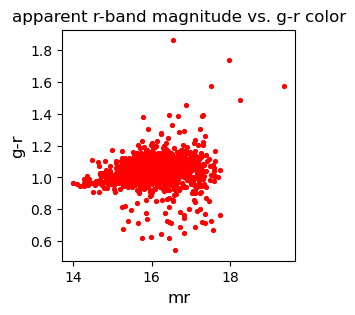

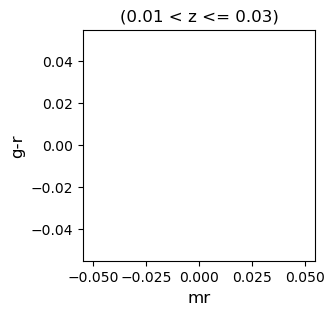

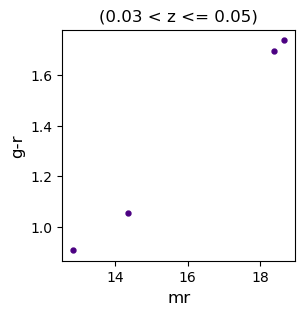

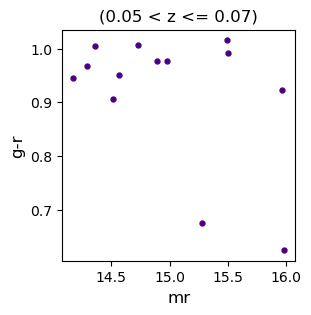

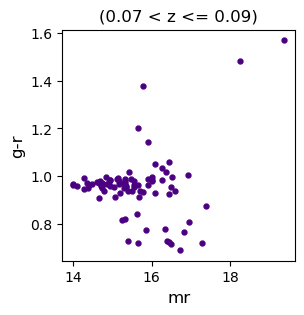

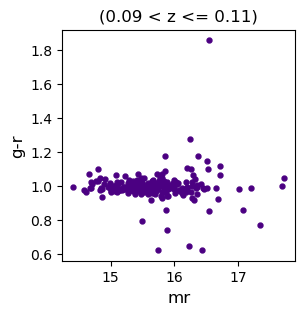

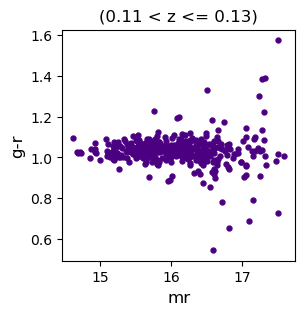

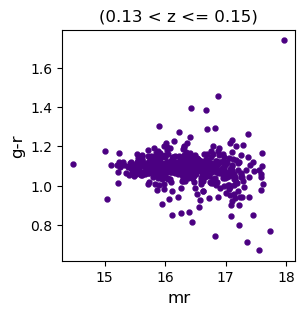

In [64]:
import pandas 
import numpy as np

url = "https://drive.google.com/uc?id=1SOjdxSKAj4gWkq8ikGAzKMgorINzA14P"
catalog = pandas.read_csv(url)

z = np.array(catalog['zsp'], dtype='float')

# Selecting SDSS BCG galaxies within redshift range 0.05<z<0.15, and starting a class 
# BCG_Analysis which is initialized with input dataframe with SDSS BCG properties

class BCG_Analysis(): 
    def __init__(self, catalog):
        self.catalog = catalog

# Making scatter plot of the $g-r$ colors for entire redshift range
    
    def filter_plot(self, zmin = 0.05, zmax = 0.15):
        mask = (self.catalog['zsp'] > zmin) & (self.catalog['zsp'] <= zmax)
        filtered_sample = self.catalog[mask]
        
        gr = filtered_sample['g-r']
        mr = filtered_sample['rmag']
        
        plt.figure(figsize=(3,3))
        plt.xlabel('mr', fontsize=12)
        plt.ylabel('g-r', fontsize=12)
        plt.scatter(mr, gr, marker='.', color='red', 
            s=30)
        plt.title('apparent r-band magnitude vs. g-r color')
        plt.show()

# Making scatter plot of the $g-r$ colors for sub-intervals of size 0.02, examining how distribution changes with redshift. 
    
    def interval_plot(self, zmin=0.01, zmax=0.15, step=0.02):
        intervals = np.arange(zmin, zmax+0.02, step)
        for i in range(len(intervals)-1):
            sub_zmin = intervals[i]
            sub_zmax = intervals[i+1]
            
            if (zmax-zmin) < step:
                print('Interval is too small, no data')
                continue
                
            mask = (self.catalog['zsp'] > sub_zmin) & (self.catalog['zsp'] <= sub_zmax)
            filtered_subsample = self.catalog[mask]

            gr = filtered_subsample['g-r']
            mr = filtered_subsample['rmag']
            
            plt.figure(figsize=(3,3))
            plt.xlabel('mr', fontsize=12)
            plt.ylabel('g-r', fontsize=12)
            plt.scatter(mr, gr, marker='.', color='indigo', 
                s=50)
            plt.title(f'({sub_zmin:.2f} < z <= {sub_zmax:.2f})')
            plt.show()
            
analysis = BCG_Analysis(catalog)

analysis.filter_plot(zmin=0.05, zmax=0.15)

analysis.interval_plot(zmin=0.01, zmax=0.15, step=0.02)

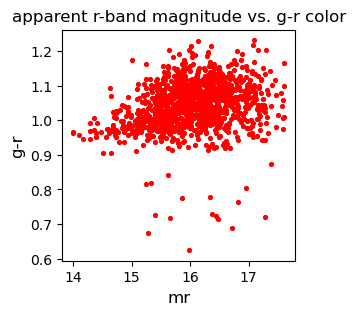

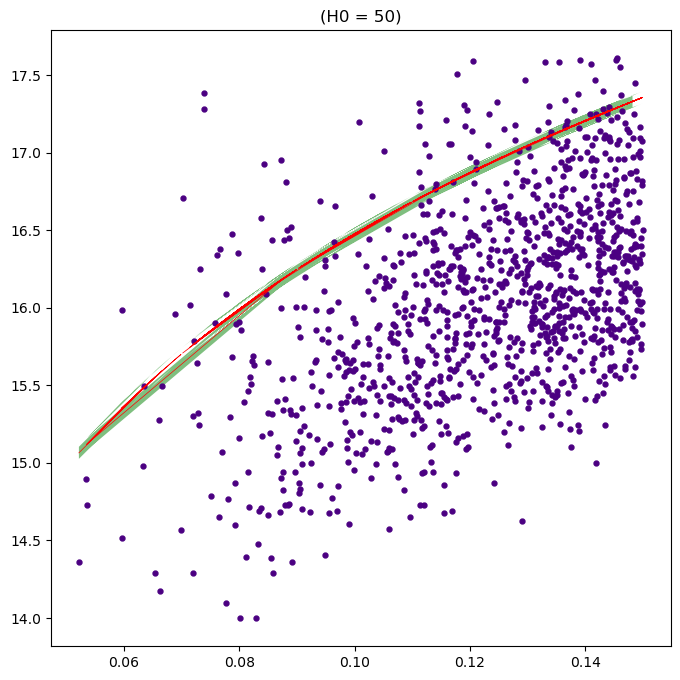

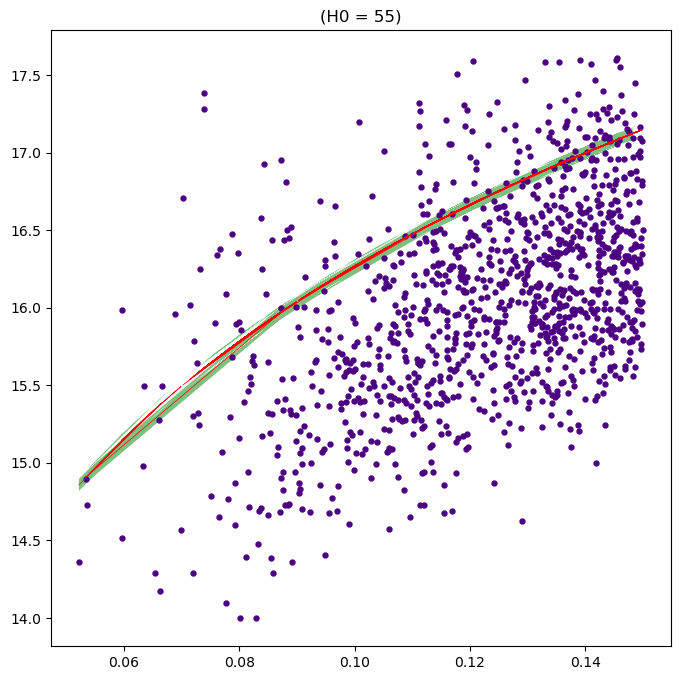

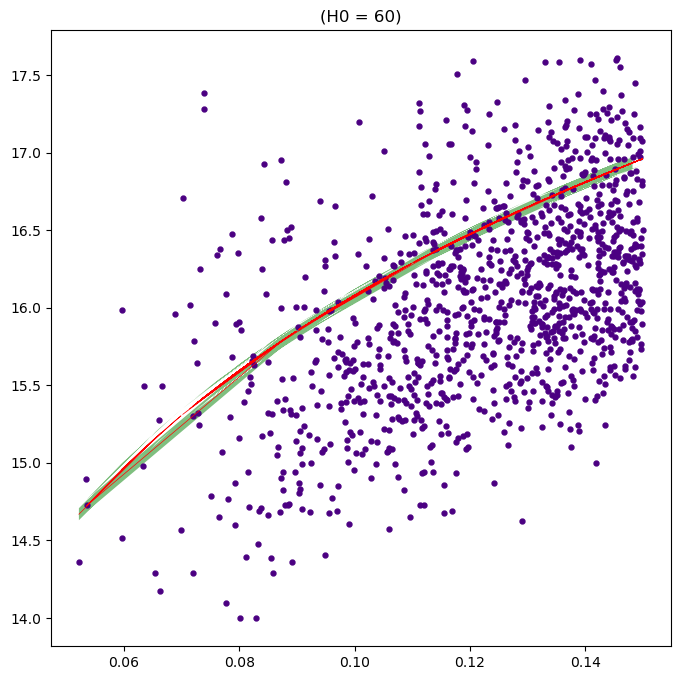

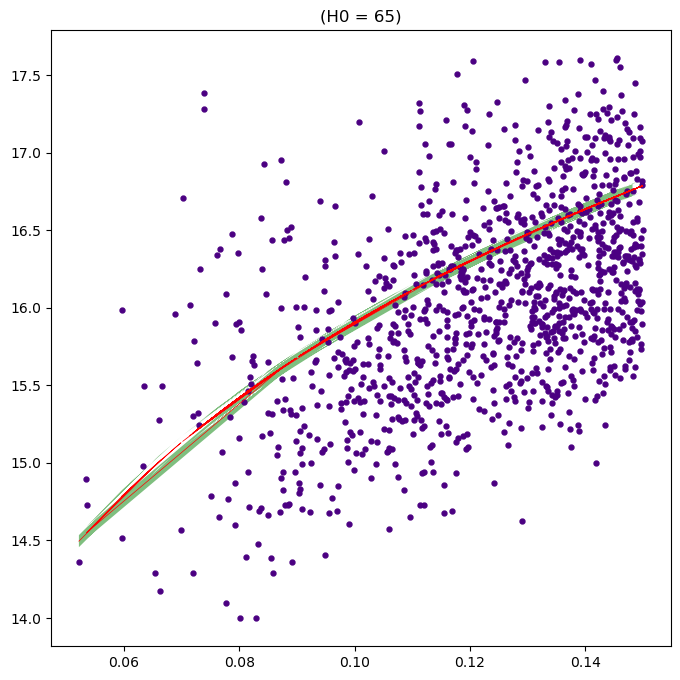

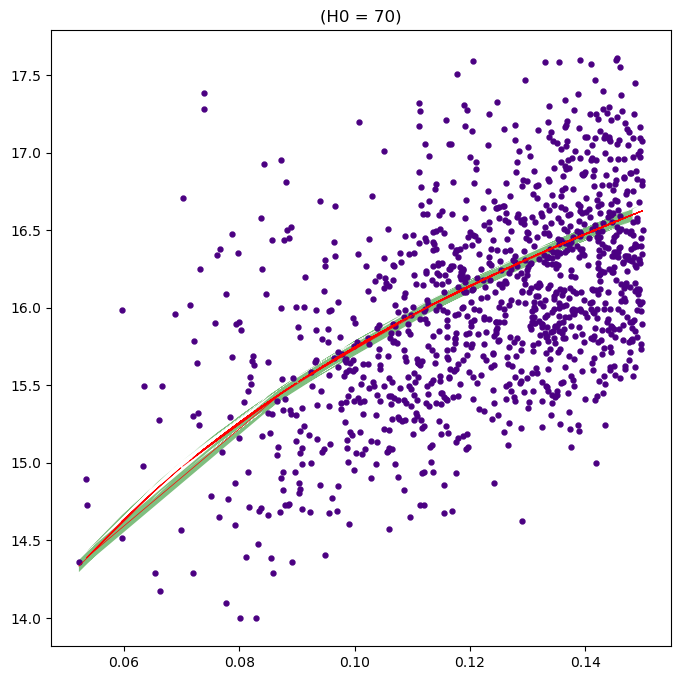

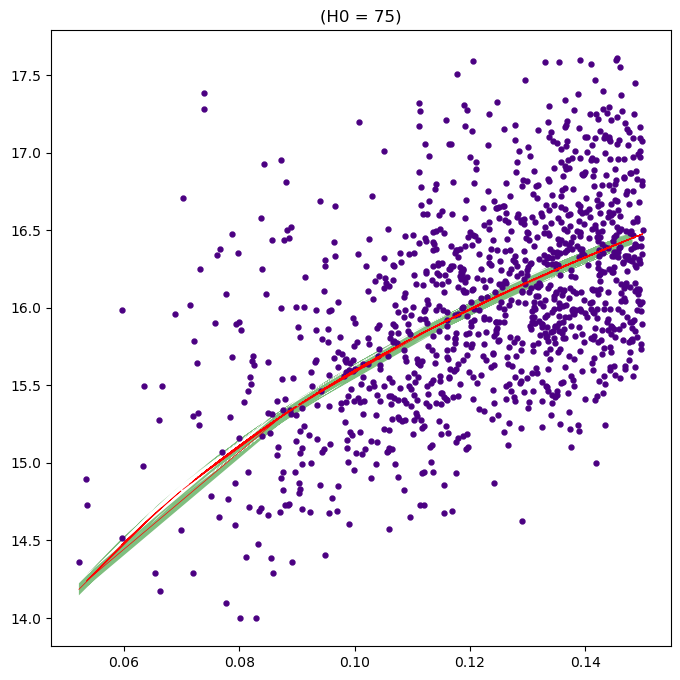

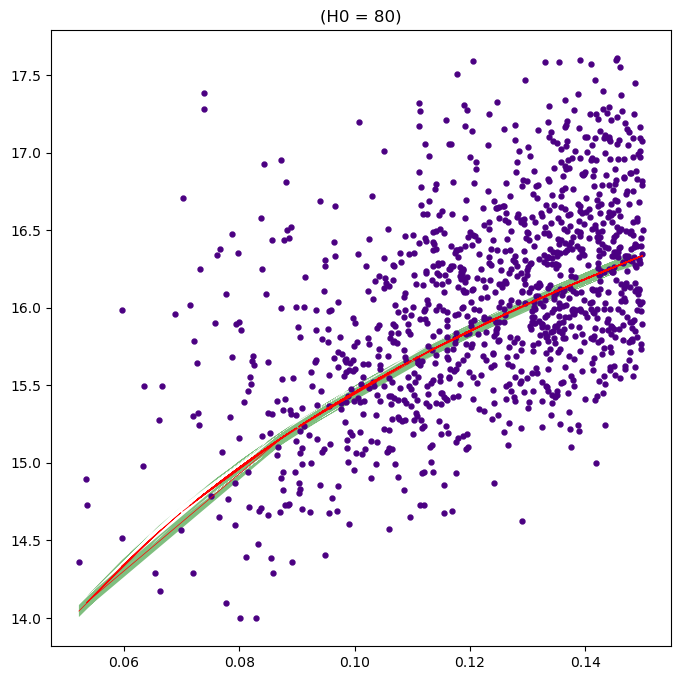

In [65]:
url = "https://drive.google.com/uc?id=1SOjdxSKAj4gWkq8ikGAzKMgorINzA14P"
catalog = pandas.read_csv(url)

z = np.array(catalog['zsp'], dtype='float') 

# Removing outliers from the sample using the sigma-clipping method as a method in the BCG_Analysis class 

def sigma_clip(data, niter = 5, s_th = 3.0): 
    data = np.array(data)
    outflag = np.ones_like(data, dtype=bool)
    while niter > 0:
        xmean = np.mean(data[outflag])
        xstd = np.std(data[outflag])

        outflag = np.abs((data - xmean)/xstd) <= s_th

        niter = niter - 1

    filtered_arr = (data)[outflag]
    final_xmean = np.mean(filtered_arr)
    final_xstd = np.std(filtered_arr)
    return filtered_arr, final_xmean, final_xstd, outflag

class BCG_Analysis(): 
    def __init__(self, catalog):
        self.catalog = catalog
        self.filtered_catalog = pandas.DataFrame()
        self.outlier_removal()
    def outlier_removal(self, zmin = 0.05, zmax = 0.15, step = 0.02, niter = 5, s_th = 3.0):
        intervals = np.arange(zmin, zmax+step, step)
        filtered_catalog = pandas.DataFrame()
        for i in range(len(intervals)-1):
            sub_zmin = intervals[i]
            sub_zmax = intervals[i+1]
            
            if (zmax-zmin) < step:
                print('Interval is too small, no data')
                continue
                
            mask = (self.catalog['zsp'] > sub_zmin) & (self.catalog['zsp'] <= sub_zmax)
            filtered_subsample = self.catalog[mask]

            mr = filtered_subsample['rmag']
            g_r = filtered_subsample['g-r']

            filtered_mr,_,_,_ = sigma_clip(mr, niter=niter, s_th=s_th)
            filtered_g_r,_,_,_ = sigma_clip(g_r, niter=niter, s_th=s_th)

            filtered_data = filtered_subsample[filtered_subsample['rmag'].isin(filtered_mr) & filtered_subsample['g-r'].isin(filtered_g_r)]
            filtered_catalog = pandas.concat([filtered_catalog, filtered_data])
        
        self.filtered_catalog = filtered_catalog

    def filter_plot(self, zmin = 0.05, zmax = 0.15):
        mask = (self.filtered_catalog['zsp'] > zmin) & (self.filtered_catalog['zsp'] <= zmax)
        filtered_sample = self.filtered_catalog[mask]
        
        gr = filtered_sample['g-r']
        mr = filtered_sample['rmag']
        
        plt.figure(figsize=(3,3))
        plt.xlabel('mr', fontsize=12)
        plt.ylabel('g-r', fontsize=12)
        plt.scatter(mr, gr, marker='.', color='red', 
            s=30)
        plt.title('apparent r-band magnitude vs. g-r color')
        plt.show()

# Plotting magnitude $m_r$ vs $z$ as a scatter plot for BCG galaxies and as a line for the input values 
# of $H_0$ and $M_0$ (The Hubble Diagram)
    
    def interval_plot(self, zmin=0.01, zmax=0.15, step=0.02):
        intervals = np.arange(zmin, zmax+step, step)
        for i in range(len(intervals)-1):
            sub_zmin = intervals[i]
            sub_zmax = intervals[i+1]
            
            if (zmax-zmin) < step:
                print('Interval is too small, no data')
                continue
                
            mask = (self.filtered_catalog['zsp'] > sub_zmin) & (self.filtered_catalog['zsp'] <= sub_zmax)
            filtered_subsample = self.filtered_catalog[mask]

            gr = filtered_subsample['g-r']
            mr = filtered_subsample['rmag']
            
            plt.figure(figsize=(4,4))
            plt.xlabel('mr', fontsize=12)
            plt.ylabel('g-r', fontsize=12)
            plt.scatter(mr, gr, marker='.', color='indigo', 
                s=50)
            plt.title(f'({sub_zmin:.2f} < z <= {sub_zmax:.2f})')
            plt.show()
    def hubble_diagram(self, H0, M0, M0_sigma):
        c = 299792  #In Mpc
        
        z = self.filtered_catalog['zsp']
        mr = self.filtered_catalog['rmag']
        
        d = (c*z) / H0  # Luminosity distance in Mpc
        mod = 5 * np.log10(d) + 25  # Distance modulus
        
        m_m0 = mod + M0
        m_lower = mod + (M0-M0_sigma)
        m_upper = mod + (M0+M0_sigma)
        
        plt.figure(figsize=(8, 8))
        plt.fill_between(z, m_lower, m_upper, color='green', edgecolor='none', alpha=0.5)
        plt.scatter(z, mr, marker='.', color='indigo', 
                s=50)
        plt.plot(z, m_m0, color='red', lw=0.5, label=f'H0 = {H0}, M0 = {M0}')
        plt.title(f'(H0 = {H0})')
        plt.show()

analysis = BCG_Analysis(catalog)

analysis.outlier_removal(zmin = 0.05, zmax = 0.15, step = 0.02, niter = 5, s_th = 3.0)
analysis.filter_plot(zmin=0.05, zmax=0.15)

# Estimating best fit (the Hubble Constant)

analysis.hubble_diagram(H0=50, M0=m0, M0_sigma=m0_sigma)
analysis.hubble_diagram(H0=55, M0=m0, M0_sigma=m0_sigma)
analysis.hubble_diagram(H0=60, M0=m0, M0_sigma=m0_sigma)
analysis.hubble_diagram(H0=65, M0=m0, M0_sigma=m0_sigma)
analysis.hubble_diagram(H0=70, M0=m0, M0_sigma=m0_sigma)
analysis.hubble_diagram(H0=75, M0=m0, M0_sigma=m0_sigma)
analysis.hubble_diagram(H0=80, M0=m0, M0_sigma=m0_sigma)

My estimation: 
From my graphs, it seems like H0 = 70 matches the scatter distribution the best. Therefore, H0 = 70 km s−1 Mpc−1 is my estimate of the Hubble Constant. 

Comparison to other estimations:
The paper "In the Realm of the Hubble tension − a Review of Solutions" lays out direct and indirect measurements for the Hubble Constant over the years. The smallest estimation made is 67.27 ± 0.60 km s−1 Mpc−1, while the largest was 76.0 ± 2.6 km s−1 Mpc−1. While this is a relatively large range, both of these measurements are close to my estimate of 70 km s−1 Mpc−1 in relation to the total scale I tried (from H0=50 to H0=80). In general, most of the measurements were pretty close to my number, not exceeding or undervaluing my estimation by more than 3-4. This is evident in the most recent measurements, as follows: 

Di Valentino (2021): 72.7 ± 1.1 

Di Valentino (2021): 72.94 ± 0.75 

Denzel et al. (2021): 71.8 +3.9 -3.3 

Blakeslee et al. (2021) IR-SBF w/ HST: 73.3 ± 2.5 

Dutcher et al. (2021), SPT: 68.8 ± 1.5 

Balkenhol et al. (2021), Planck 2018+SPT+ACT : 67.49 ± 0.53 

In my own research here at UChicago, I use a Hubble Constant of H0 = 70 km s−1 Mpc−1, dealing with all types of galaxies, from about 8-620 Mpc away. So, I was pretty happy to find an estimation so close to what I use in real life. 